# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Exercise 4.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.


The code presented executes a simulation of the dynamic of a group of 108 molecules, interacting with a Lennard-Jones potential, evolved using the Verlet method. In order to estimate the averages of interesting quantities such as energy and temperature the system needs to be thermalised. The code thus distinguishes three different modes:
- **Starting mode**, which begins from a fixed configuration (such as the FCC crystalline lattice) and saves the last configuration to be used afterwards. In order to speed up the simulation and save memory resources, in this mode the averages are not estimated.
- **Equilibration mode** which starts from the previous configuration and evolves without estimating the averages of interest. This mode is to be repeated until the system reaches equilibration
- **Measure mode**, which begins from the previous equilibrated configuration, actually measures the quantities of interest and averages them over a number of blocks fixed by the user.
    
The programme receives the instructions on the relevant mode from the user as booleans; it is thought so that the code cannot enter *measure mode* without having before executed a *start mode*

In [2]:
# a bunch of vectors that will be useful later
file_name=['solid', 'liquid', 'gas']
color = [['xkcd:sky blue', 'xkcd:electric blue', 'xkcd:cobalt'], ['xkcd:apple green','xkcd:grass green','xkcd:forest green'],['xkcd:peach','xkcd:burnt orange','xkcd:red orange'] ]
eq_temperature = [0.8, 1.1, 1.2]

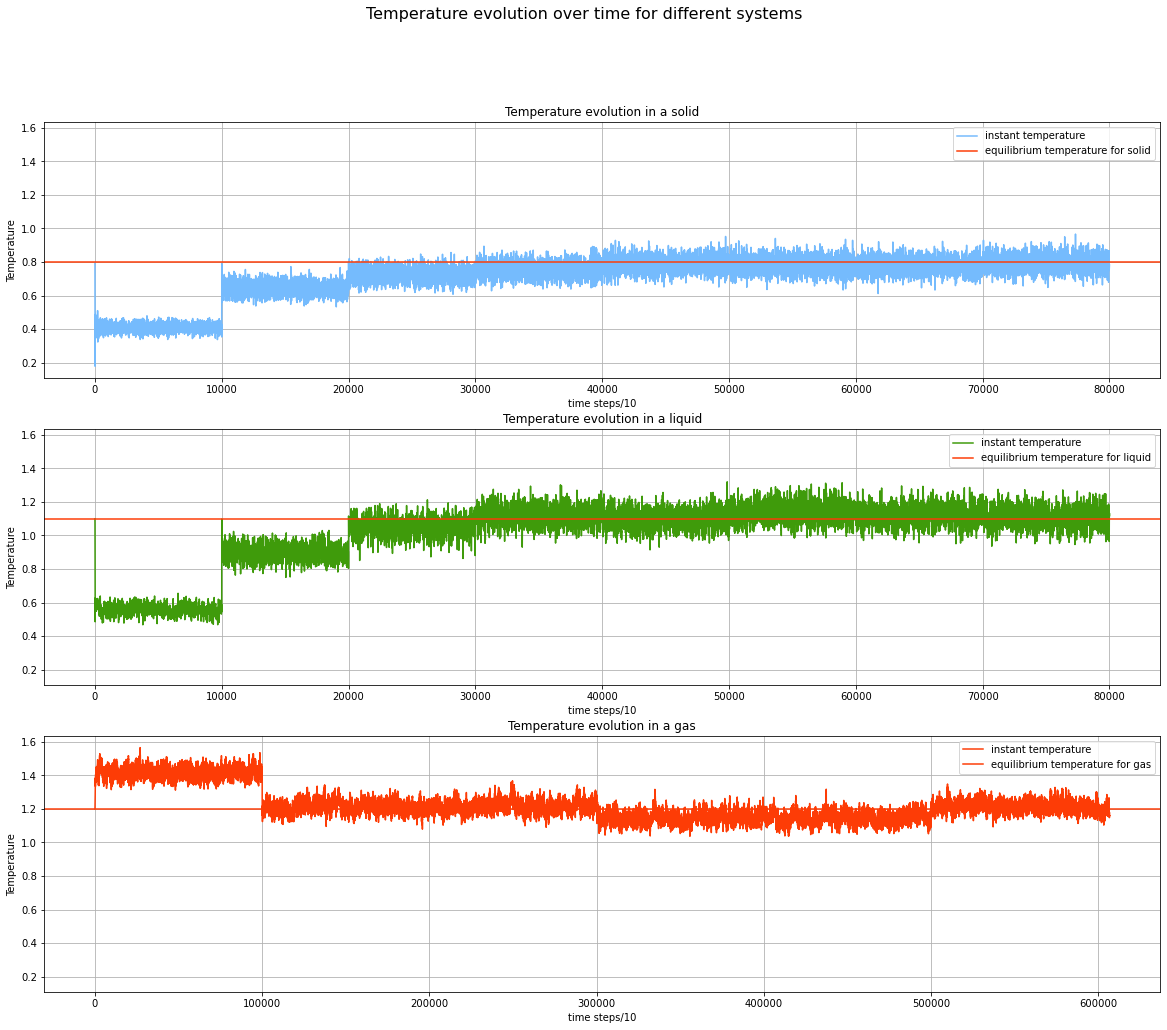

In [18]:
fig,axs = plt.subplots(3, 1, sharey=True, figsize=[20,16])
fig.suptitle('Temperature evolution over time for different systems', fontsize=16)

for i in range (3):
    prog_temp = np.loadtxt("MD_NVE_data/output_temp."+file_name[i]+".txt")
    axs[i].plot(prog_temp, label='instant temperature', c=color[i][i])
    axs[i].axhline(y=eq_temperature[i], color='xkcd:red orange', label = 'equilibrium temperature for '+file_name[i])
    axs[i].set_xlabel('time steps/10')
    axs[i].set_ylabel('Temperature')
    axs[i].set_title('Temperature evolution in a '+file_name[i])
    axs[i].legend()
    axs[i].grid(True)

plt.show()

The previous graphs show the instantaneous temperature sampled as $T = \frac{2}{3} \langle K/N \rangle $ in the equilibration phase. Since the Verlait algorithm for the dynamics determines only the position and not the velocities, the kinetic energy and the tempeature at the beginning of the simulation are not defined. The simulation forces the dynamics to the equilibrium temperature by fixing a scale factor with which initial randomly generated velocities are rescaled. This is evident in the way the average temperature presents some "jumps" from previous average values. As time passes (and different simulations are made) the rescaling tends to unity, to the point in which the system has actually reached the equilibrium temperature. 

The crystalline structure is varied from the initial conditions: for a solid and a liquid, the particles are slightly off the initial FCC lattice positions, indicating that the crystal has melted to various degrees, depending on the final temperature. For the gas, in which the density is much smaller than the previous cases, it would be absurd to try equilibrate the temperature starting from a FCC lattice: it would be like trying to evaporate an ice cube straight out of the freezer! In order to simulate more efficiently the equilibration phase, the gasseous system starts from the last configuration of the liquid system, simulating the more realistic physical process of evaporation of a shallow puddle.

The continuous jumps indicate the main difference between a single, long simulation and many, shorter simulations one after the other: each time a simulation begins, the system nears the equilibrium temperature because it is forced to a rescaling of the particles' velocities. During the simulation, the system stabilises around the temperature value that caracterises the particles after the rescaling. A single, long simulation without any rescaling would just remain aruond the equilibrium temperature it starts with.
There is no right indicator to tell when the equilibration has ended: we just compared the instantaneous temperature to the expected value -the one with which the system is forced- and determine the conditions are optimal for measurement after some time that the temperature remains stable enough. This heuristic method obviously has its limitations: for example, we can notice that the solid temperature is constantly slightly under the target value. This discrepancy must be considered when estimating the other values.

As it can be seen for the gas system at around half the equilibration, trying to rescale continuously could also result in issues to remain at the equilibrium temperature. For example, if the velocities of the final configuration yield a slightly different temperature than the expected, the following simulation forces the system to a different temperature, thus it is actually moved away from the equilibrium it might have already reached.

### Exercise 4.2
The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 
divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>


### Exercise 04.3

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\varepsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
    
   1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
   2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
   3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!


In order to obtain the final values in SI units, I simply multiplied the final values obtained in the simulation, expressed in reduced units, by the respective unit. Thus, for Argon, the temperature $T = \frac{\varepsilon}{k_B} \cdot T^\star = 120 \cdot T^\star$ $K$ and the energy per particle (any kind…) $E/N = \varepsilon \cdot E^\star / N = 1.656 \times 10^{-21} E^\star /N$ $J$. 
This results much simpler and efficient than to estimate all the reduced values in SI units during the computation; morevoer, due to the small values of some constants, such as $k_B = 1.38 \times 10^{-23} J \cdot K^{-1}$, this would lead to approximation issues with the final results.

The energies per particle are obviously minuscule, directly comparable to the value of Boltzmann's constant $k_B = 1.38 \times 10^{-23} J \cdot K^{-1}$, the  proportionality factor that relates the average relative kinetic energy of particles with the thermodynamic temperature. Computation with these orders of magnitude is clearly impossible, all values would simply be approximated to zero: therefore, all energies are expressed in $10^{-23} J$ so that the operations involve only a dozen of decimal places.

Pressure, or force over unit surface, has the units of energy over volume:

$$[\text{Pa}] = \left[\dfrac{N}{m^2} \right] = \left[\dfrac{J}{m^3}\right]$$

In fact pressure can be interpreted as the energy density of a system, how much a system is able to "push away". Therefore, the conversion factor for pressure is given by 
$$\dfrac{\epsilon}{\sigma^3 \cdot k_B}$$
Unlike energy per particle, this pressure constant is quite large: $4215 \times 10^4$ $\text{Pa}$ $= 421,5 $ $\text{bar}$, comparable to that of macroscopic systems. This is because pressure is an *intensive* quantity, it does not depend on scale, so the values considered are directly comparable to those of larger system. 

In [19]:
# fundamental units
T_unit = 120 # K
k_B = 1.380649 #x 10^-23 J k^-1
len_unit = 0.34 # x 10^-9 m
mass_unit = 39.948 #amu

en_unit = T_unit * k_B #J
p_unit = en_unit / (len_unit**3) # x 10^4 Pa = J/m^3

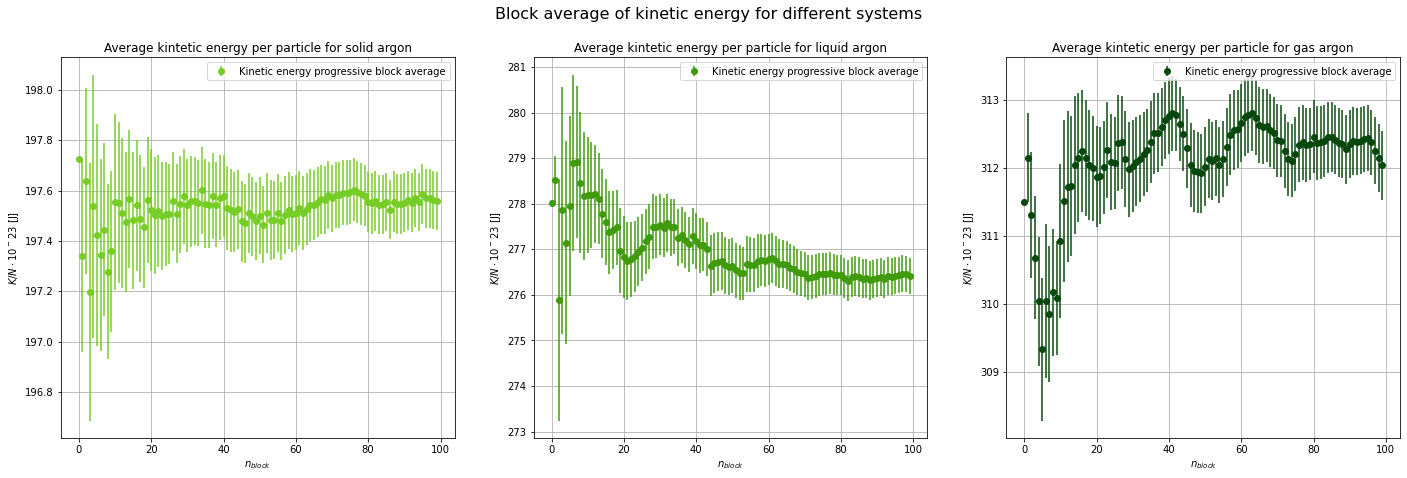

In [20]:
#kinetic energy
fig,axs = plt.subplots(1, 3, figsize=[24,7])
fig.suptitle('Block average of kinetic energy for different systems', fontsize=16)

E_kin_v = []

for i in range (3):
    E_tot, E_err = np.loadtxt("MD_NVE_data/ave_ekin."+file_name[i]+".txt", usecols=(0,1), unpack='true')
    x = np.arange(len(E_tot))
    axs[i].errorbar(x, E_tot*en_unit, yerr=E_err*en_unit, fmt='o',label ='Kinetic energy progressive block average', c=color[1][i])
    axs[i].set_xlabel('$n_{block}$')
    axs[i].set_ylabel('$K/N \cdot 10^-23$ [J]')
    axs[i].set_title('Average kintetic energy per particle for '+file_name[i]+ ' argon')
    axs[i].legend()
    axs[i].grid(True)
    E_kin_v.append(E_tot*en_unit)
    
plt.show()

    

These first graphs show the average kinetic energy per particle in different systems. As already stated, the Verlet algorithm does not depend on the velocities for the evolution. However, the velocities can be easely determined as the average speed for each step. Instead of considering the average kinetic energy for each particle, contributes are all summed and only afterwards divided by the number of particles. This is to avoid the fluctuations due to a wide distribution of velocities, as we expect especially for a gasseous system. 

The graphs compare the progressive block average over the same number of 100 blocks. However, the number of steps per each block is different for the various systems. In particular, due to its high instability, the gasseous system needed about 10 times as many steps per block than the liquid and solid for the fluctuations to be low enough to obtain an adequate average. In retrospect, while the solid presents high stability for all blocks, both the liquid and the gas phase may have needed slightly longer simulations to have "flatter" averages. 

In the end, what matter are the final values of the average, which all seem quite reasonable. The solid, tightly binded to the cristalline structure, has a mauch lower kinetic energy per particle, with very few fluctuations (all the particles tend to move of the same ammount). The liquid and gas phases are much more free, therefore the averages tend to get higher. The fact that the averages do not converge to the final value quickly is due to the higly unstable structure of the systems.

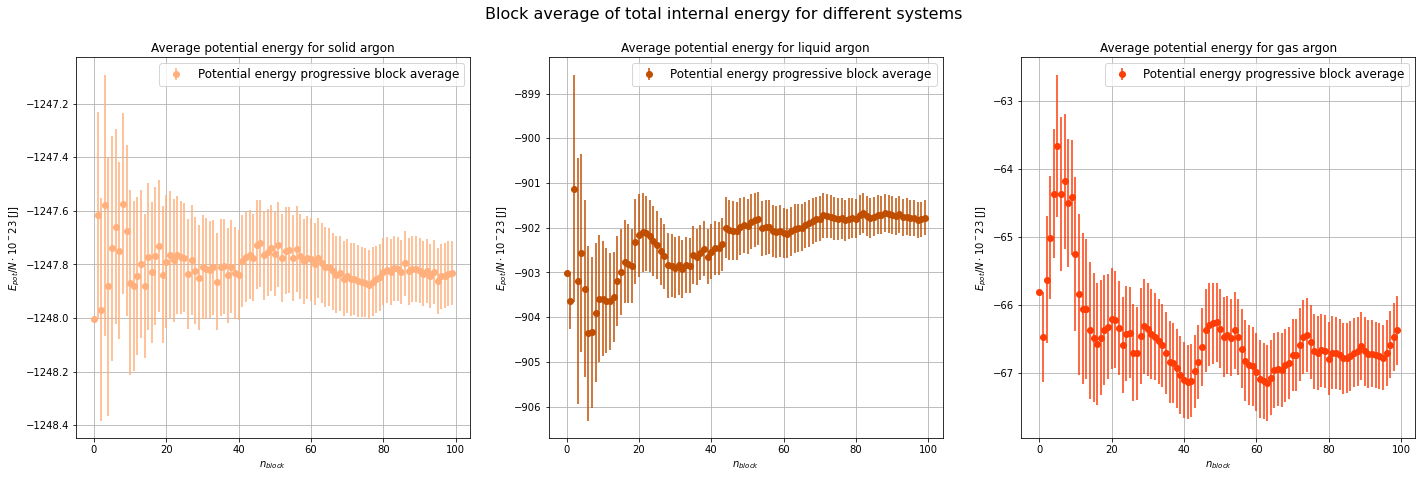

In [21]:
#potential energy
fig,axs = plt.subplots(1, 3, figsize=[24,7])
fig.suptitle('Block average of total internal energy for different systems', fontsize=16)

E_pot_v = []

for i in range (3):
    E_tot, E_err = np.loadtxt("MD_NVE_data/ave_epot."+file_name[i]+".txt", usecols=(0,1), unpack='true')
    x = np.arange(len(E_tot))
    axs[i].errorbar(x, E_tot*en_unit, yerr=E_err*en_unit, fmt='o', label ='Potential energy progressive block average', c=color[2][i])
    axs[i].set_xlabel('$n_{block}$')
    axs[i].set_ylabel('$E_{pot}/N \cdot 10^-23$ [J]')
    axs[i].set_title('Average potential energy for '+file_name[i] + ' argon')
    axs[i].legend(fontsize='large')
    axs[i].grid(True)
    
    E_pot_v.append(E_tot*en_unit)

plt.show()

While the kinetic energy is estimated with the average velocity between time-steps, the potential energy depends only on the relative distances between particles and can be therefore computed exaclty. As for the kinetic energy, in order to consider the system characteristics, the energy contributes of each particle are summed together and only afterwards the total is divided by the number of particles. In this particular Molecular Dynamics simulation, the potential between particles is assumed to follow the (reduced) Lennard-Jones model: 

$$ v^{\star}(r) = 4 \left[ \left( \frac{1}{r} \right)^{12} - \left( \frac{1}{r} \right)^{6} \right]$$

This potential is highly repulsive at short distances, when particles touch, and is moderaltely attractive for greater distances, with $ \lim_{r \to \infty} v^{\star} (r) = 0^{-}$. Since simulation works in periodic boundary conditions, an additional term of *tail-correction* had to be added, estimated as the average total contribution from all particles outside the cut-off radius: 

$$ \dfrac{V_{tail}}{N} = 2 \pi \rho \int_{r_c}^{\infty} dr r v(r) g(r) \approx 8 \pi \rho_{LJ} \epsilon \left(\dfrac{1}{9 r_c ^9} - \dfrac{1}{3 r_c ^3} \right)$$ 

The tail-correction is relevant but not predominant.
In the solid case, at low temperatures, the potential is very strong, since the particles are always quite close-packed, but stable, since the distances between particles tend to remain the same. On the other hand, the gas has very low potential, so the particles can be approximated as almost free: very loosely bound. The liquid presents aspects form both the other systems: as we have already seen, the particles are quite active, as we would expect in a fluid; at the same time, they are still bound together, as it can be seen by the very strong potential energy.

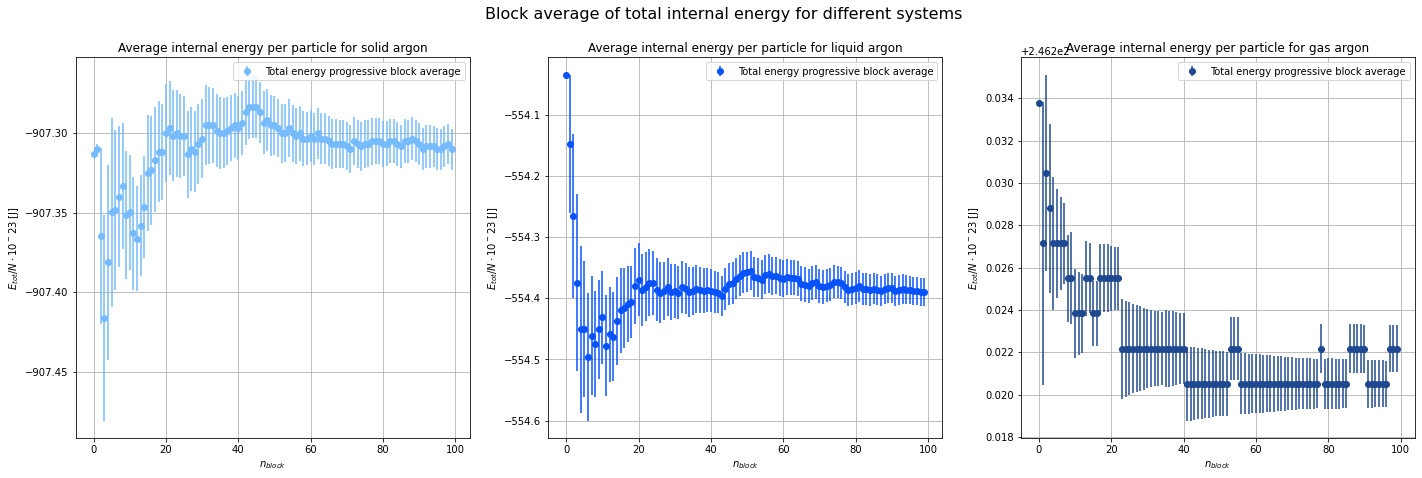

In [22]:
#total energy
fig,axs = plt.subplots(1, 3, figsize=[24,7])
fig.suptitle('Block average of total internal energy for different systems', fontsize=16)

E_tot_v = []      # to store all data for later

for i in range (3):
    E_tot, E_err = np.loadtxt("MD_NVE_data/ave_etot."+file_name[i]+".txt", usecols=(0,1), unpack='true')
    x = np.arange(len(E_tot))
    axs[i].errorbar(x, E_tot*en_unit, yerr=E_err*en_unit, fmt='o', label ='Total energy progressive block average', c=color[0][i])
    axs[i].set_xlabel('$n_{block}$')
    axs[i].set_ylabel('$E_{tot}/N \cdot 10^-23$ [J]')
    axs[i].set_title('Average internal energy per particle for '+file_name[i]+ ' argon')
    axs[i].legend()
    axs[i].grid(True)

    E_tot_v.append(E_tot*en_unit)


plt.show()

The total internal energy (per particle) is estimated sumply by summing the kinetic and the potential terms. By looking at the values, we can see that for the solid the potential energy largely prevails, for the liquid the potential still prevails while for the gas the potential only slightly affects the kinetic term. The gas energy is largely positive, therefore the particles tend to escape the initial configuration. We can observe that the internal energy of the gas system is actually quite stable, so much that the graphs presents jumps in the line since the precision of the values is not sufficient to consider these minuscule fluctuations.

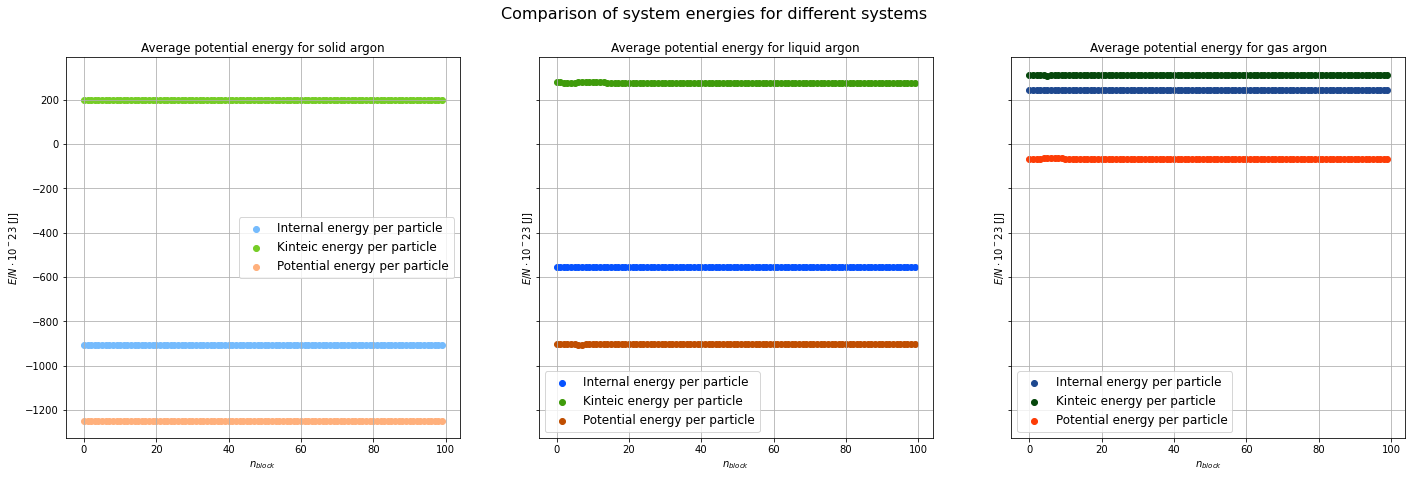

In [23]:
fig,axs = plt.subplots(1, 3, figsize=[24,7], sharey=True)
fig.suptitle('Comparison of system energies for different systems', fontsize=16)

for i in range (3):
    x = np.arange(len(E_tot_v[i]))
    axs[i].scatter(x, E_tot_v[i], label ='Internal energy per particle', c=color[0][i])
    axs[i].scatter(x, E_kin_v[i], label ='Kinteic energy per particle ', c=color[1][i])
    axs[i].scatter(x, E_pot_v[i], label ='Potential energy per particle', c=color[2][i])
    
    axs[i].set_xlabel('$n_{block}$')
    axs[i].set_ylabel('$E/N \cdot 10^-23$ [J]')
    axs[i].set_title('Average potential energy for '+file_name[i] + ' argon')
    axs[i].legend(fontsize='large')
    axs[i].grid(True)

plt.show()

These last graphs simply compare all the energy terms between them, as confirmation of what already stated. We simply note that the energy fluctuations are much too small to be appreciated at these scales.

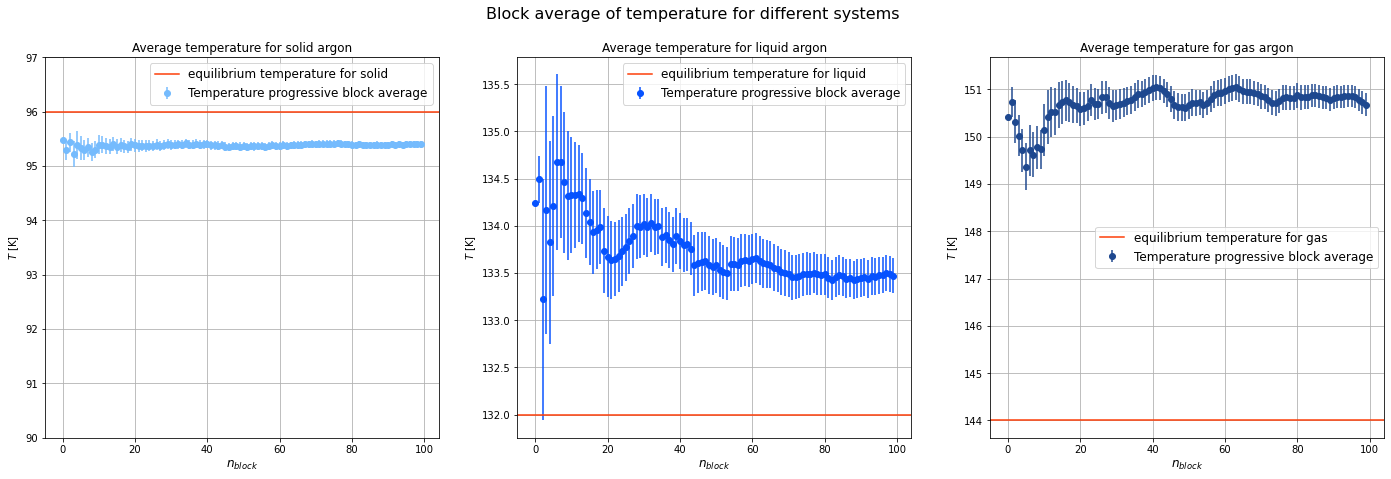

In [31]:
#temperature
fig,axs = plt.subplots(1, 3, figsize=[24,7])
fig.suptitle('Block average of temperature for different systems', fontsize=16)

for i in range (3):
    T, T_err = np.loadtxt("MD_NVE_data/ave_temp."+file_name[i]+".txt", usecols=(0,1), unpack='true')
    x = np.arange(len(T))
    axs[i].errorbar(x, T*T_unit, yerr=T_err*T_unit, fmt='o', label ='Temperature progressive block average', c=color[0][i])
    axs[i].axhline(y=eq_temperature[i]*T_unit, color='xkcd:red orange', label = 'equilibrium temperature for '+file_name[i])

    axs[i].set_xlabel('$n_{block}$',fontsize='large')
    axs[i].set_ylabel('$T$ [K]')
    axs[i].set_title('Average temperature for '+ file_name[i] + ' argon')
    axs[i].legend(fontsize='large')
    axs[i].grid(True)
    
axs[0].set_ylim([90,97])
plt.show()

Finally we show the average temperature in Kelvin units compared with the expected temperature which was assigned at the system at the beginning of the simulation. The averages we see in the graphs are computed from the kinetic gas theory definition of temperature as "average kinetic energy per particle". When compared to the fixed value we see some discrepancies, due to the fact that the kinetic energy is inferred from the average velocities and not computed directly. This results in the offset between estimated values and expected values. The results get quite close to the actual temperatures fixed at the beginning of the simulation, but do not result compatible. The low uncertainty in the values is a sign that the system is equilibrated enough to have precise averages; however the equilibration point might be slightly off the real value, to a point that the system alone cannot reach (as it is already thermalised), yielding discrepancies with the expected value.

### <span style="color:green"> Optional exercise</span>

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: istantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

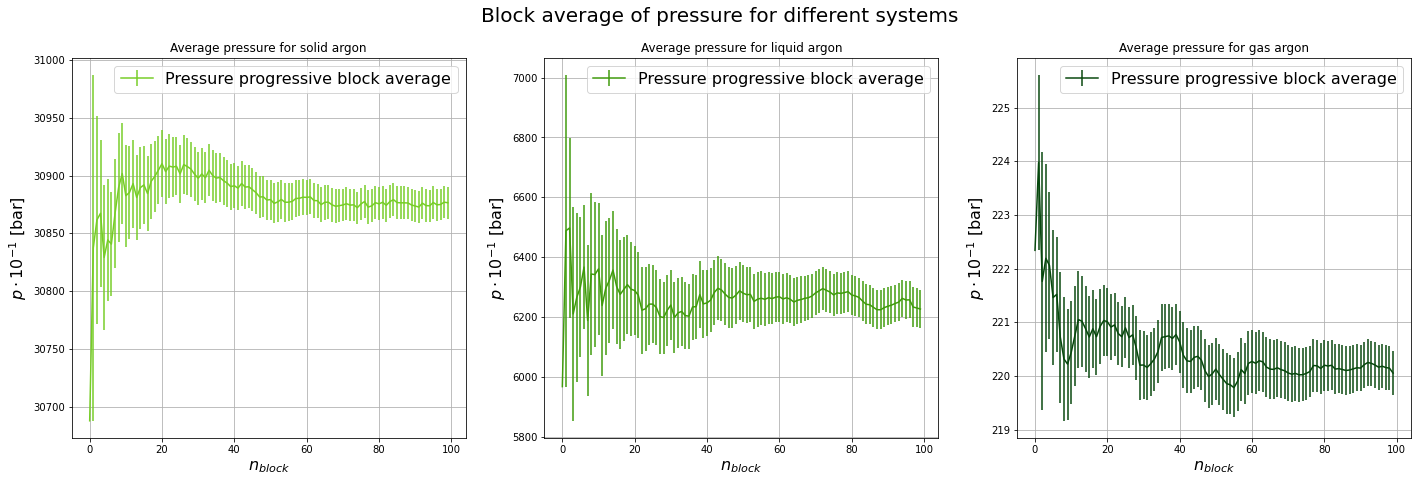

In [17]:
# pressure 
fig,axs = plt.subplots(1, 3, figsize=[24,7])
fig.suptitle('Block average of pressure for different systems', fontsize=20)

for i in range (3):
    P, P_err = np.loadtxt("MD_NVE_data/ave_pres."+file_name[i]+".txt", usecols=(0,1), unpack='true')
    x = np.arange(len(T))
    axs[i].errorbar(x, P*p_unit, yerr=P_err*p_unit, label ='Pressure progressive block average', c=color[1][i])
    axs[i].set_xlabel('$n_{block}$',fontsize=16)
    axs[i].set_ylabel('$p \cdot 10^{-1}$ [bar]',fontsize=16)
    axs[i].set_title('Average pressure for '+ file_name[i] + ' argon')
    axs[i].legend(fontsize=16)
    axs[i].grid(True)
    
plt.show()

As briefly explained, the pressure is computed from two different terms: one from the ideal gas state equation and one from the virial theorem. As for the potential energy, the pressure needs a tail correction due to the effect of particles outside the cut-off radius: 

$$ \dfrac{\langle P_{LJ} \rangle _{tail}}{3N \epsilon} \approx 32 \pi \rho_{LJ} \left(\dfrac{1}{9 r_c ^9} - \dfrac{1}{6 r_c ^3} \right)$$

Unlike the energies seen, the pressure seems very unstable with very low uncertainty; obviously the solid has the highest value of pressure as the particles are all close-packed; the liquid still presents quite a large value, sign of the high interaction between particles, while in the gas the pressure is present but quite small: the tail correction is almost the dominant term, as very few particles visit the space insiede the critical radius.